## Observations and Insights 

In [155]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [156]:
# Count number of mice
mice = combined_study_data['Mouse ID'].value_counts()
num_mice = len(mice)
num_mice

249

In [157]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_study_data.loc[combined_study_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [158]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined_study_data[combined_study_data['Mouse ID']== 'g989'] 
g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [159]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_mice_data = clean_mice_data.reset_index()
clean_mice_data

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [160]:
clean_g989 = clean_mice_data[clean_mice_data['Mouse ID']== 'g989'] 
clean_g989

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,909,g989,Propriva,Female,21,26,0,45.000000,0
909,911,g989,Propriva,Female,21,26,5,47.570392,0
910,913,g989,Propriva,Female,21,26,10,49.880528,0
911,915,g989,Propriva,Female,21,26,15,53.442020,0
912,917,g989,Propriva,Female,21,26,20,54.657650,1
913,918,g989,Propriva,Female,21,26,25,56.045564,1
914,919,g989,Propriva,Female,21,26,30,59.082294,1
915,920,g989,Propriva,Female,21,26,35,62.570880,2


In [161]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mice_data['Mouse ID'].value_counts()
num_clean_mice = len(clean_mice)
num_clean_mice

249

## Summary Statistics

In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
dr = clean_mice_data.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tv = dr['Tumor Volume (mm3)'].mean()

median_tv = dr['Tumor Volume (mm3)'].median()

var_tv = dr['Tumor Volume (mm3)'].var()

sd_tv = dr['Tumor Volume (mm3)'].std()

sem_tv = dr['Tumor Volume (mm3)'].sem()

# mean_tv
# median_tv
# var_tv
# sd_tv
# sem_tv

# Assemble the resulting series into a single summary dataframe
# Create columns for the dataframe
summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tv,"Median Tumor Volume":median_tv,"Variance":var_tv, "Standard Deviation": sd_tv, "SEM": sem_tv})
summary_df = summary_df.round(2)
summary_df





,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum = clean_mice_data.groupby(["Drug Regimen",]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

agg_sum.columns = ["Mean Tumor Volume","Median Tumor Volume","Variance", "Standard Deviation", "SEM"]

agg_sum = agg_sum.round(2)

agg_sum


,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts

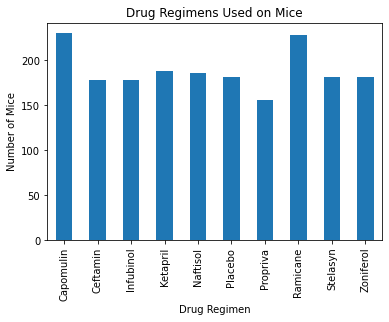

In [164]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
dm_group = clean_mice_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
bp1 = dm_group.plot.bar(align= "center", width= .5)

plt.title("Drug Regimens Used on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

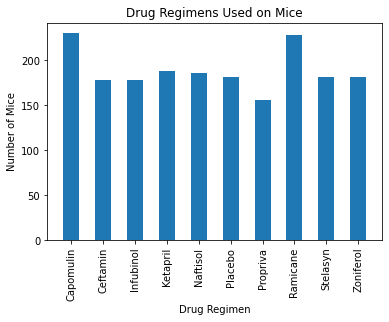

In [165]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

y_axis = dm_group.values
x_axis = np.arange(0,len(y_axis),1)
x = dm_group.index

plt.bar(x, y_axis, align= "center", width= .5)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Drug Regimens Used on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

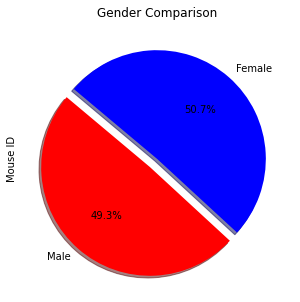

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_mice_data.groupby(["Sex"]).count()["Mouse ID"]

labels = ["Male", "Female"]

colors = ["red", "blue"]

explode = (0.1, 0)

p1 = gender_group.plot.pie(y='Sex', figsize=(5, 5), labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Gender Comparison")

plt.show()

Text(0.5, 1.0, 'Gender Comparison')

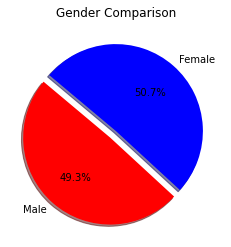

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

sizes = gender_group.values

colors = ["red", "blue"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Gender Comparison")


## Quartiles, Outliers and Boxplots

In [168]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_tp = clean_mice_data.groupby(['Mouse ID',]).Timepoint.max()
final_tp = final_tp.reset_index()
final_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_final =final_tp[["Mouse ID","Timepoint"]].merge(clean_mice_data, on=["Mouse ID","Timepoint"], how='left')

merge_final


four_regimens = merge_final[merge_final["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

four_regimens


,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
3,a275,45,493,Ceftamin,Female,20,28,62.999356,3
6,a411,45,327,Ramicane,Male,3,22,38.407618,1
7,a444,45,430,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...,...
239,y769,45,1845,Ceftamin,Female,6,27,68.594745,4
240,y793,45,124,Capomulin,Male,17,17,31.896238,2
241,y865,45,1855,Ceftamin,Male,23,26,64.729837,3
245,z578,45,84,Ramicane,Male,11,16,30.638696,0


In [169]:
# Put treatments into a list for for loop (and later for plot labels)
four_reg_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_reg_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
cap= four_regimens.loc[four_regimens['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ram= four_regimens.loc[four_regimens['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
inf= four_regimens.loc[four_regimens['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
cef= four_regimens.loc[four_regimens['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']



cquartiles = cap.quantile([.25,.5,.75])
clowerq = cquartiles[0.25]
cupperq = cquartiles[0.75]
ciqr = cupperq-clowerq

cquartiles
ciqr


clower_outlier= clowerq-(1.5*iqr)
cupper_outlier= cupperq+(1.5*iqr)

clower_outlier
cupper_outlier
    
    
rquartiles = ram.quantile([.25,.5,.75])
rlowerq = rquartiles[0.25]
rupperq = rquartiles[0.75]
riqr = rupperq-rlowerq

rquartiles
riqr


rlower_outlier= rlowerq-(1.5*iqr)
rupper_outlier= rupperq+(1.5*iqr)

rlower_outlier
rupper_outlier


iquartiles = inf.quantile([.25,.5,.75])
ilowerq = iquartiles[0.25]
iupperq = iquartiles[0.75]
iiqr = iupperq-ilowerq

iquartiles
iiqr


ilower_outlier= ilowerq-(1.5*iqr)
iupper_outlier= iupperq+(1.5*iqr)

ilower_outlier
iupper_outlier


celower_outlier= celowerq-(1.5*iqr)
ceupper_outlier= ceupperq+(1.5*iqr)

celower_outlier
ceupper_outlier

cequartiles = cef.quantile([.25,.5,.75])
celowerq = cequartiles[0.25]
ceupperq = cequartiles[0.75]
ceiqr = ceupperq-celowerq

cequartiles
ceiqr
    

celower_outlier= celowerq-(1.5*iqr)
ceupper_outlier= ceupperq+(1.5*iqr)

celower_outlier
ceupper_outlier


        
    # Locate the rows which contain mice on each drug and get the tumor volumes
four_regimens[['Drug Regimen','Mouse ID', 'Tumor Volume (mm3)']]    
   
    # add subset 
    
four_reg_mice = four_regimens[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']] 
four_reg_mice  
    


    

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Infubinol,a203,67.973419
1,Infubinol,a251,65.525743
3,Ceftamin,a275,62.999356
6,Ramicane,a411,38.407618
7,Ramicane,a444,43.047543
...,...,...,...
239,Ceftamin,y769,68.594745
240,Capomulin,y793,31.896238
241,Ceftamin,y865,64.729837
245,Ramicane,z578,30.638696


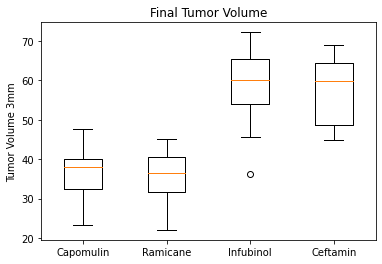

In [170]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

regimens = [cap, ram, inf, cef]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume 3mm')
ax1.boxplot(regimens, labels=four_reg_list)
plt.show()

## Line and Scatter Plots

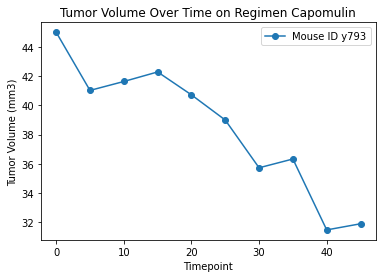

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_reg = clean_mice_data.loc[clean_mice_data['Drug Regimen'] == 'Capomulin']
mouse = clean_mice_data.loc[clean_mice_data['Mouse ID'] == 'y793']

cap_reg
mouse

x_axis = mouse['Timepoint']
y_axis = mouse['Tumor Volume (mm3)']

mouse_handle, = plt.plot(x_axis, y_axis, marker ='o', label ='Mouse ID y793')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Over Time on Regimen Capomulin')
plt.legend(loc="upper right")
plt.show()


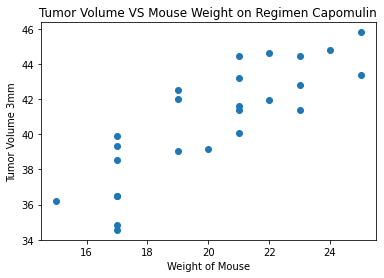

In [172]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_tum = clean_mice_data.loc[clean_mice_data['Drug Regimen'] == 'Capomulin']
cap_mouse_grp = cap_tum.groupby(['Mouse ID'])
cap_mouse_grp.head()

av_cap_vol = cap_mouse_grp['Tumor Volume (mm3)'].mean()
av_cap_vol

cap_weight= cap_mouse_grp['Weight (g)'].mean()
cap_weight.head()

x_values = cap_weight
y_values = av_cap_vol
plt.scatter(x_values,y_values)
plt.xlabel('Weight of Mouse')
plt.ylabel('Tumor Volume 3mm')
plt.title('Tumor Volume VS Mouse Weight on Regimen Capomulin')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


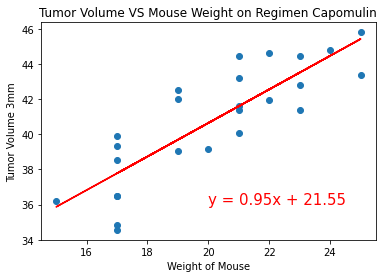

The correlation between Tumor Volume and Mouse Weight is 0.84


In [178]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_weight
y_values = av_cap_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Weight of Mouse')
plt.ylabel('Tumor Volume 3mm')
plt.title('Tumor Volume VS Mouse Weight on Regimen Capomulin')
plt.show()
print(f"The correlation between Tumor Volume and Mouse Weight is {round(rvalue,2)}")